<a href="https://colab.research.google.com/github/ruiiary/commercelaw-words/blob/main/Final_project_2222050.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **24-2 콘텐츠프로그래밍기초 기말 프로젝트**


# 1. Web crawling을 통한 데이터 수집 (30점)
- 구텐베르크 사이트(https://www.gutenberg.org/)에서 원하는 책의 본문 중 일부를 수집
- 그외 다른 사이트(위키피디아, 나무위키, 인터넷기사 등)에서 수집할 시 추가 점수 부여 (+10점)

In [ ]:
!pip install requests
!pip install beautifulsoup4

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (23.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123632 files and direc

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
# 웹 크롤링을 위한 셀레니움 설치와 실행 코드
import sys

!sudo add-apt-repository ppa:saiarcot895/chromium-beta
#실행 결과에서 Enter 입력
!sudo apt remove chromium-browser
!sudo snap remove chromium
!sudo apt install chromium-browser

!pip3 install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

PPA publishes dbgsym, you may need to include 'main/debug' component
Repository: 'deb https://ppa.launchpadcontent.net/saiarcot895/chromium-beta/ubuntu/ jammy main'
Description:
This PPA contains the latest Chromium Beta builds, with hardware video decoding enabled (hidden behind a flag), and support for Widevine (needed for viewing many DRM-protected videos) enabled.

== Hardware Video Decoding ==

To enable hardware video decoding, start Chromium with the --enable-features=VaapiVideoDecoder argument. To make this persistent, create a file at /etc/chromium-browser/customizations/92-vaapi-hardware-decoding with the following contents:

CHROMIUM_FLAGS="${CHROMIUM_FLAGS} --enable-features=VaapiVideoDecoder"

See also https://wiki.archlinux.org/title/Chromium#Hardware_video_acceleration for more information on VAAPI video decoding support.

=== Widevine Support ===

The packages in this PPA have support for Widevine inside Chromium enabled. However, you still need to copy some files from 

In [ ]:
#라이브러리 설치
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

#크롬에 셀레니움 옵션 조정
service = Service(executable_path=r'/usr/bin/chromedriver')
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
driver = webdriver.Chrome(service=service, options=options)    #driver 변수에 크롬 들어감

In [ ]:
# 셀레니움 설치 확인
!pip show selenium
!pip install --upgrade selenium

Name: selenium
Version: 4.27.1
Summary: Official Python bindings for Selenium WebDriver
Home-page: https://www.selenium.dev
Author: 
Author-email: 
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: certifi, trio, trio-websocket, typing_extensions, urllib3, websocket-client
Required-by: 


In [ ]:
# 상법을 가져오기 위한 사이트
url = "https://glaw.scourt.go.kr/wsjo/lawod/sjo190.do?contId=3242211&q=*&nq=&w=lawod&section=lawod_tot&subw=lawod_jomun&subsection=lawod_jomun_cont&subId=1&csq=&groups=2,3&category=&outmax=1&msort=d:7:1,d:2:1,s:1:0,p:2:0,d:3:1,p:1:0&onlycount=&sp=&d1=&d2=&d3=&d4=&d5=&pg=9&p1=&p2=&p3=&p4=&p5=&p6=&p7=&p8=&p9=&p10=&p11=&p12=&sysCd=&tabGbnCd=&saNo=&joNo=&lawNm=&hanjaYn=N&userSrchHistNo=&poption=&srch=&range=&daewbyn=N&smpryn=N&idgJyul=01&newsimyn=Y&trtyNm=&tabId=#1733553255578"

In [ ]:
#사이트 접속
driver.get(url)

In [ ]:
xpath = '//*[@id="areaBmunTab"]/li[1]/a'
jomun_xpath = '//*[@id="areaJomunList"]/p[4]/a[2]'

In [ ]:
#xpath를 이용해서 '본문' 탭을 클릭하고 '목차'를 클릭한 페이지의 html 가져오기
driver.find_element('xpath', xpath).click()
driver.find_element('xpath', jomun_xpath).click()
html = driver.page_source

soup = BeautifulSoup(html, 'html')

div_element = soup.find_all('div', id="areaDetail")

if div_element:
    text = div_element[0].get_text(strip=True, separator='\n') # \n으로 나눠서 출력하기
    print(text[:5000])

본문
제1편 총칙
제1장 통칙
제1조(상사적용법규)
상사에 관하여 본법에 규정이 없으면 상관습법에 의하고 상관습법이 없으면 민법의 규정에 의한다.
제2조(공법인의 상행위)
공법인의 상행위에 대하여는 법령에 다른 규정이 없는 경우에 한하여 본법을 적용한다.
제3조(일방적 상행위)
당사자중 그 1인의 행위가 상행위인 때에는 전원에 대하여 본법을 적용한다.
제2장 상인
제4조(상인-당연상인)
자기명의로 상행위를 하는 자를 상인이라 한다.
제5조(동전-의제상인)
① 점포 기타 유사한 설비에 의하여 상인적 방법으로 영업을 하는 자는 상행위를 하지 아니하더라도 상인으로 본다.
② 회사는 상행위를 하지 아니하더라도 전항과 같다.
제6조(미성년자의 영업과 등기)
미성년자가 법정대리인의 허락을 얻어 영업을 하는 때에는 등기를 하여야 한다.
[전문개정 2018.9.18]
제7조(미성년자와 무한책임사원)
미성년자가 법정대리인의 허락을 얻어 회사의 무한책임사원이 된 때에는 그 사원자격으로 인한 행위에는 능력자로 본다.
[전문개정 2018.9.18]
제8조(법정대리인에 의한 영업의 대리)
①  법정대리인이 미성년자, 피한정후견인 또는 피성년후견인을 위하여 영업을 하는 때에는 등기를 하여야 한다.
<개정 2018.9.18>
② 법정대리인의 대리권에 대한 제한은 선의의 제3자에게 대항하지 못한다.
[제목개정 2018.9.18]
제9조(소상인)
지배인, 상호, 상업장부와 상업등기에 관한 규정은 소상인에게 적용하지 아니한다.
제3장 상업사용인
제10조(지배인의 선임)
상인은 지배인을 선임하여 본점 또는 지점에서 영업을 하게 할 수 있다.
제11조(지배인의 대리권)
① 지배인은 영업주에 갈음하여 그 영업에 관한 재판상 또는 재판외의 모든 행위를 할 수 있다.
② 지배인은 지배인이 아닌 점원 기타 사용인을 선임 또는 해임할 수 있다.
③ 지배인의 대리권에 대한 제한은 선의의 제3자에게 대항하지 못한다.
제12조(공동지배인)
① 상인은 수인의 지배인에게 공동으로 대리권을 행사하게 할 수 있다.


### 아래 코드 실행 시 True가 반환되어야 함. True 반환 결과가 표시되어 있지 않을 시 1번 항목은 0점으로 채점.

In [ ]:
bool(len(text) >= 5000)
print(len(text))

263766


# 2. 단어 빈도 분석 (40점)
- 텍스트에 등장하는 각 단어들의 등장 "확률"(빈도 X)을 내림차순으로 정렬하여 그래프 그리기 (20점)
- 단어 앙상블의 엔트로피 구하기 (20점)

### text에서 단어만 추출하기

In [ ]:
# 한국어 자연어처리 패키지, 단어를 쪼개서 명사만 남김 -> 법이라 날짜, '제1조' 같은 텍스트가 많아서 어절로 안 나누고 자연어처리 패키지 사용했음
!pip install konlpy

In [ ]:
import collections
from collections import Counter
import matplotlib.pyplot as plt
from konlpy.tag import Okt # 위 라이브러리에서 명사를 구분해 주는 함수, txt 파일은 Okt 사용
import numpy as np

In [ ]:
okt = Okt()
nouns = okt.nouns(text)
words = [n for n in nouns if len(n)>1] # 한 글자짜리 데이터는 버림
c = Counter(words)

### 2-1 단어의 등장 확률 그래프

In [ ]:
al2count = dict(c)
total_count = sum(al2count.values())
print(total_count)
# 테스트
print(al2count['보험']/total_count)

39743
0.01615378808846841


In [ ]:
al2count.items()

dict_items([('본문', 28), ('총칙', 1), ('통칙', 10), ('상사', 4), ('적용', 127), ('법규', 3), ('규정', 746), ('관습법', 2), ('민법', 21), ('법인', 19), ('상행위', 31), ('대하', 364), ('법령', 40), ('다른', 215), ('경우', 1208), ('일방', 17), ('당사자', 76), ('인의', 1), ('행위', 133), ('전원', 29), ('상인', 38), ('당연상인', 1), ('자기', 93), ('명의', 17), ('동전', 12), ('의제상인', 1), ('점포', 2), ('기타', 76), ('설비', 1), ('방법', 93), ('영업', 153), ('회사', 1163), ('미성년', 6), ('등기', 216), ('법정대리인', 5), ('허락', 9), ('전문', 284), ('개정', 866), ('무한', 28), ('책임', 542), ('사원', 351), ('자격', 7), ('능력자', 1), ('대리', 9), ('피한정후견인', 2), ('피성년후견인', 2), ('대리권', 15), ('대한', 180), ('제한', 58), ('선의', 21), ('대항', 23), ('제목', 35), ('소상', 1), ('지배인', 28), ('상호', 94), ('상업장부', 14), ('상업등기', 3), ('상업사용인', 5), ('선임', 133), ('본점', 90), ('지점', 75), ('영업주', 10), ('재판', 36), ('모든', 28), ('점원', 1), ('사용', 108), ('해임', 50), ('공동', 28), ('수인', 76), ('행사', 140), ('항의', 756), ('의사표시', 8), ('효력', 109), ('소멸', 26), ('소재지', 102), ('조제', 36), ('사항', 313), ('변경', 144), ('표현지배인', 1), ('본

In [ ]:
probabilities = {word: freq / total_count for word, freq in al2count.items()}
sorted_probs = dict(sorted(probabilities.items(), key=lambda item: item[1], reverse=True))

words = list(sorted_probs.keys())
probs = list(sorted_probs.values())

In [ ]:
from matplotlib import rc
import matplotlib.pyplot as plt

# 한글 출력을 위한 나눔 고딕 폰트 설정

plt.rcParams['font.family'] = 'NanumGothic'

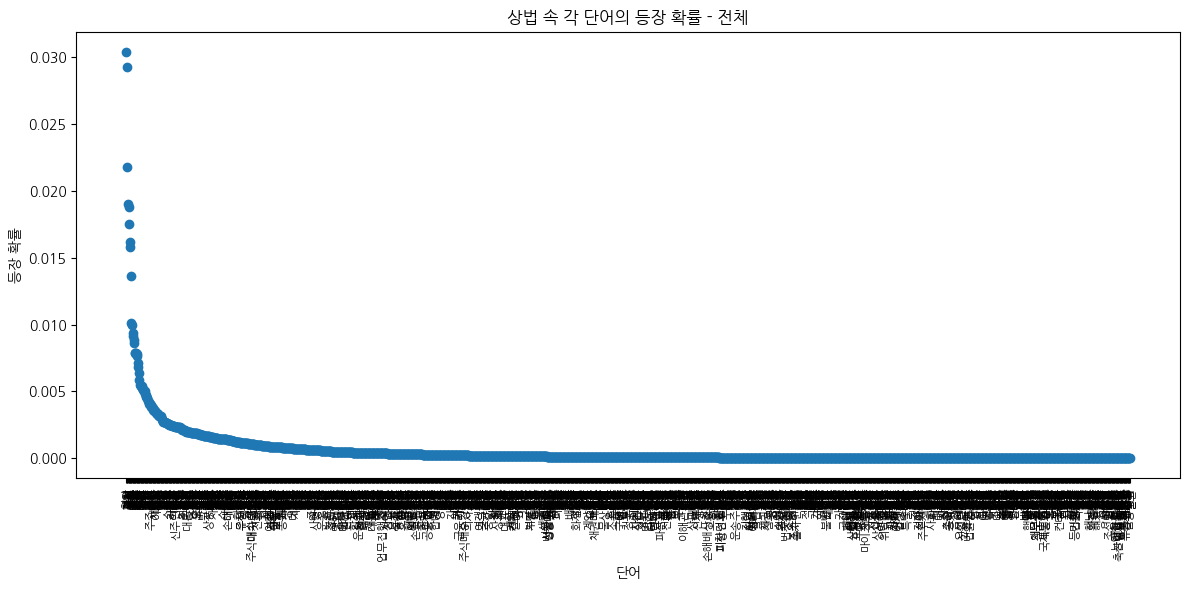

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(range(len(words)), probs)
plt.title("상법 속 각 단어의 등장 확률 - 전체")
plt.xlabel("단어")
plt.ylabel("등장 확률")
plt.xticks(range(len(words)), words, rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

In [ ]:
#너무 단어가 많아서 상위 80개만 뽑아보기
top_words = words[:80]
top_probs = probs[:80]

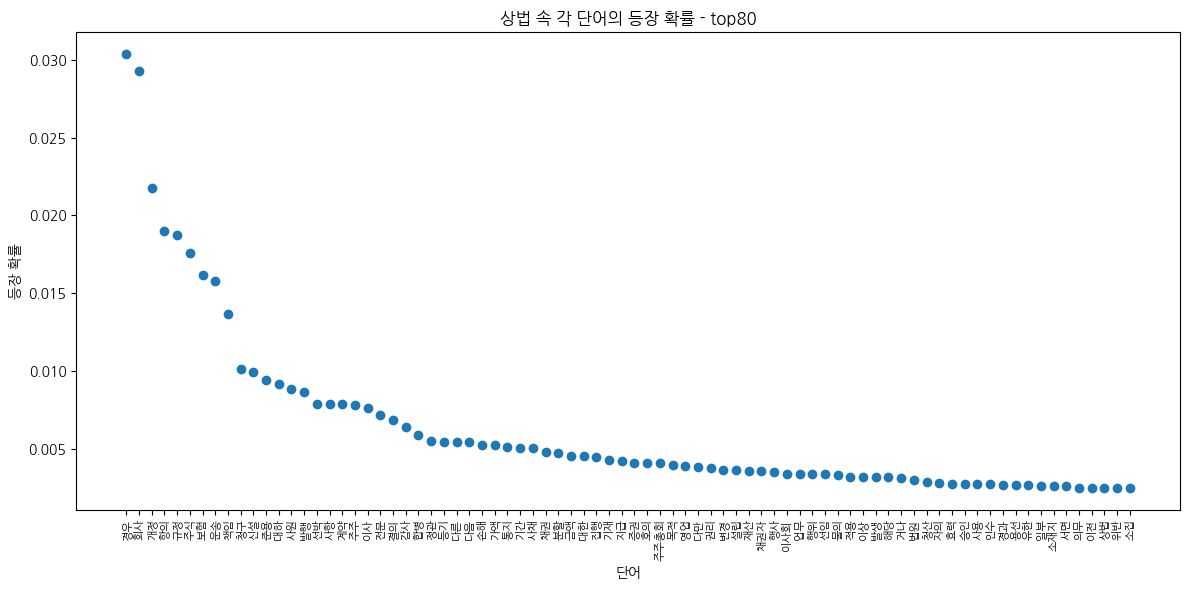

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(range(80), top_probs)
plt.title("상법 속 각 단어의 등장 확률 - top80")
plt.xlabel("단어")
plt.ylabel("등장 확률")
plt.xticks(range(80), top_words, rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

### 2-2 단어 앙상블의 엔트로피

In [ ]:
entropy = -sum(p * np.log2(p) for p in probs)
print(entropy)

8.668905562433043


=========================================================================================================

# 3. 이미지 분석
- 이미지 픽셀값의 엔트로피 계산
> - 흑백이미지인 경우 픽셀값 자체로 엔트로피 계산 (+5점)
> - RGB 이미지인 경우 각 색상채널 R,G,B 3가지 색상 채널 각각에 대해 엔트로피 계산 (+15점)

In [ ]:
!pip install pillow

In [ ]:
from PIL import Image
import numpy as np

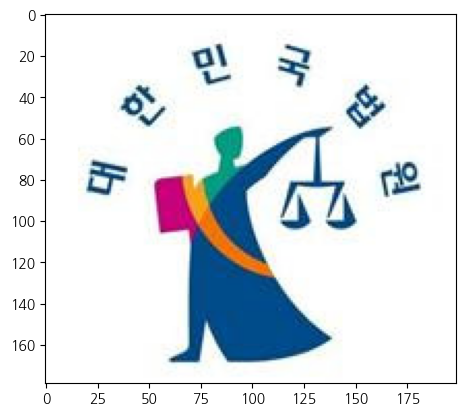

In [ ]:
img = plt.imread('courthouse_logo.jpg')
plt.imshow(img)

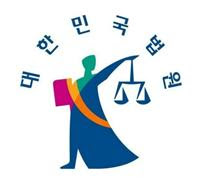

In [ ]:
img = Image.open('courthouse_logo.jpg')
img

In [ ]:
img.mode

'RGB'

In [ ]:
img = np.array(img)
img.shape

(179, 199, 3)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
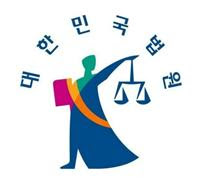

In [ ]:
img

In [ ]:
def calculate_entropy(channel):
    values, counts = np.unique(channel, return_counts=True)
    probabilities = counts / counts.sum()

    #엔트로피 게산
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

In [ ]:
r_channel = img[:, :, 0]
g_channel = img[:, :, 1]
b_channel = img[:, :, 2]

r_entropy = calculate_entropy(r_channel)
g_entropy = calculate_entropy(g_channel)
b_entropy = calculate_entropy(b_channel)

print("r_entropy:", r_entropy)
print("g_entropy:", g_entropy)
print("b_entropy:", b_entropy)


r_entropy: 3.405399192753131
g_entropy: 2.9838163782492995
b_entropy: 3.218611171482545
